In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/최종.csv',index_col=0)

In [3]:
df.isna().sum()

회사명                      0
거래소코드                    0
회계년도                     0
대주주지분변화분                 0
외국인지분분변화                 0
상장일                      0
자산                       0
당기순이익(손실)                0
미처분이익잉여금(결손금)            0
총자본증가율                   0
비유동자산증가율                 0
유동자산증가율                  0
자기자본증가율                  0
매출액증가율                   0
정상영업이익증가율                0
순이익증가율                   0
총포괄이익증가율                 0
매출액순이익률                  0
총자본순이익률                  0
자기자본순이익률                 0
매출원가대매출액비율               0
광고선전비대매출액비율              0
유보율                      0
비유동비율                    0
유동비율                     0
당좌비율                     0
현금비율                     0
부채비율                     0
유동부채비율                   0
차입금비율                    0
이자보상배율(이자비용)             0
유보액대비율                   0
유보액대납입자본배율               0
투자집중도                    0
통계청 한국표준산업분류 10차(대분류)    0
직급명                      0
1인평균지급액(임원)              0
1

In [20]:
## pairplot
sns.pairplot(수치형_df)

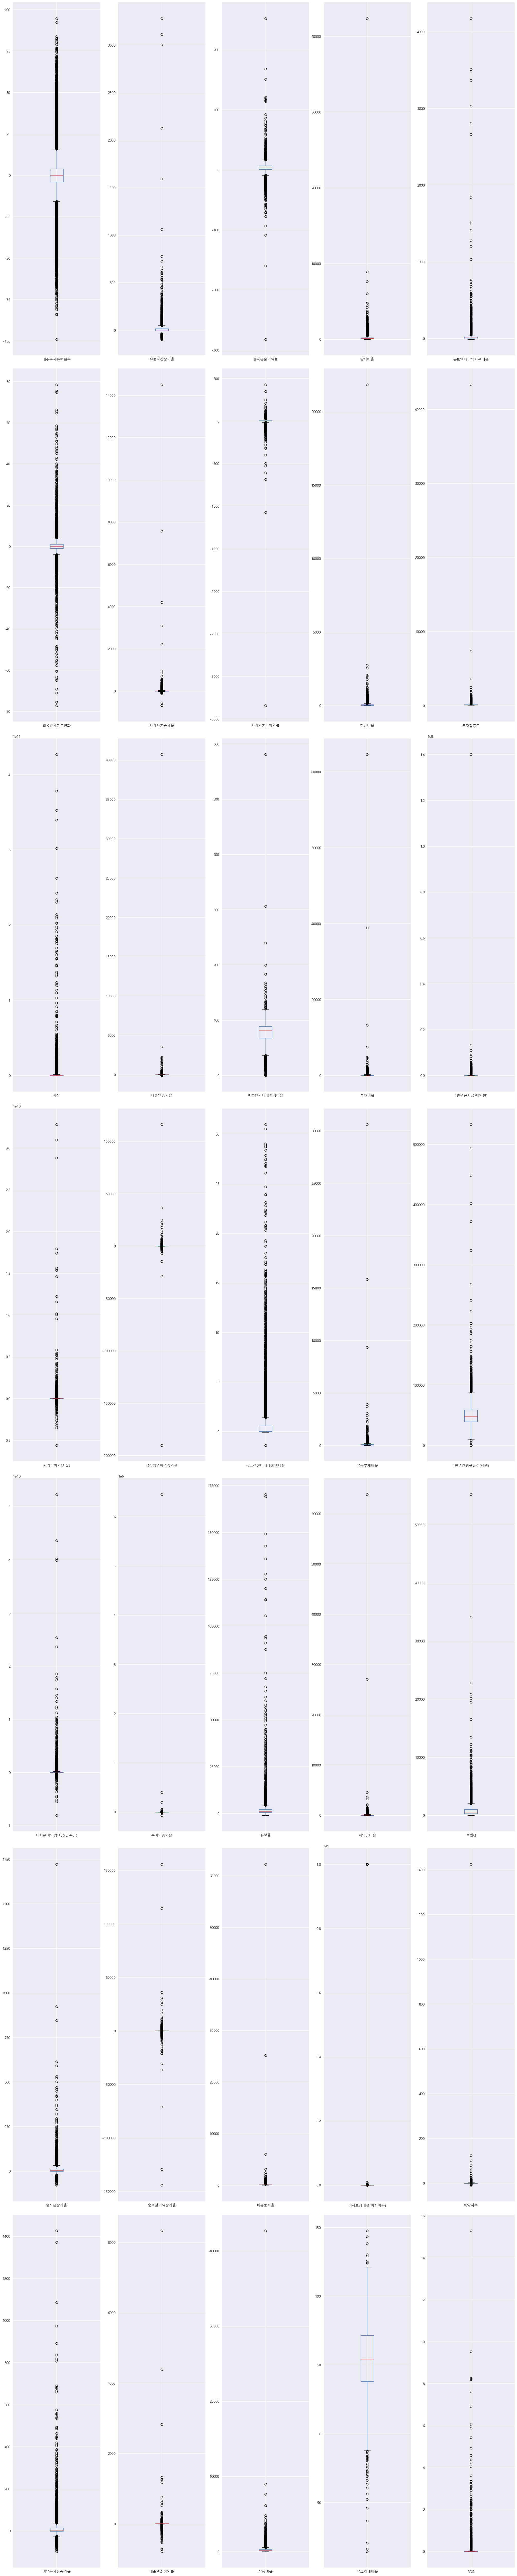

In [4]:
## 박스플랏
def boxplot(df,ncols,nrows): 
    plt.style.use('seaborn')
    warnings.simplefilter(action='ignore', category=FutureWarning)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = "Malgun Gothic"


    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

    fig.set_size_inches((20, 100))

    for col, ax in zip(df.columns, axs.T.ravel()):
        df[[col]].boxplot(ax=ax)
        
    plt.show()

수치형_df =df.select_dtypes('float')

boxplot(수치형_df,5,7)



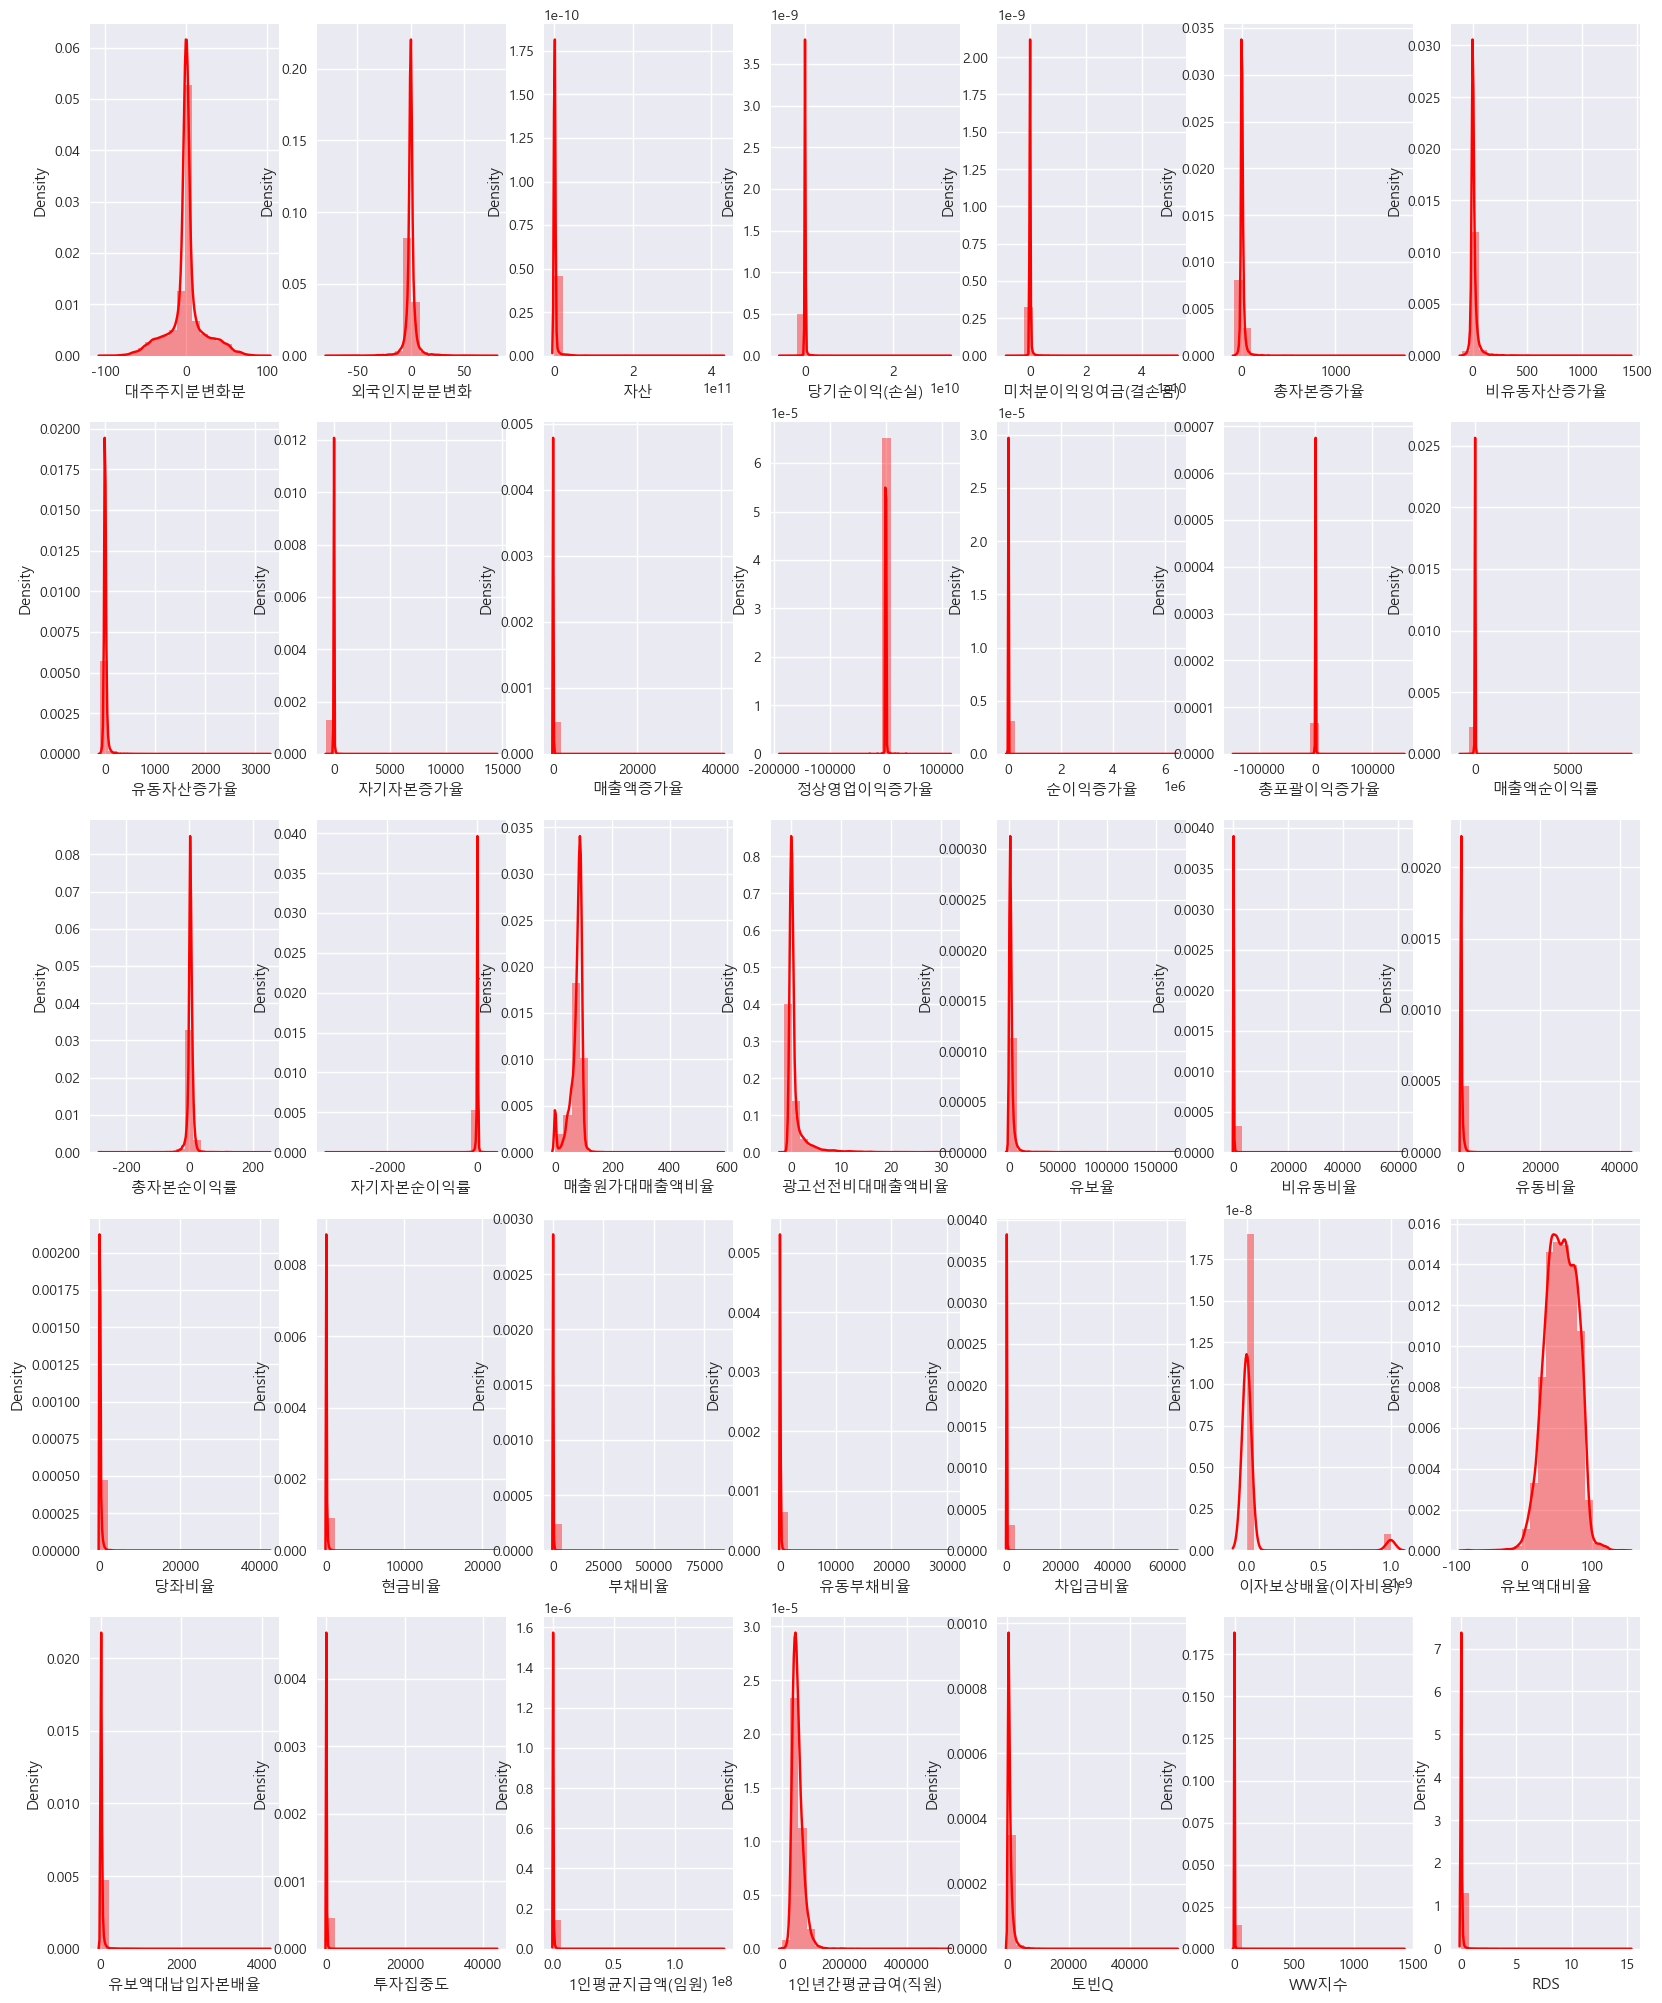

In [5]:

## distplot
def dist (df,col_n,row_n):
    
    plt.rcParams['font.family'] = "Malgun Gothic"
    plt.rcParams['axes.unicode_minus'] = False # 마이너스숫자 출력처리

    fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

    for i, col in enumerate(df.columns[:]):
        sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')

dist(수치형_df,7,5)

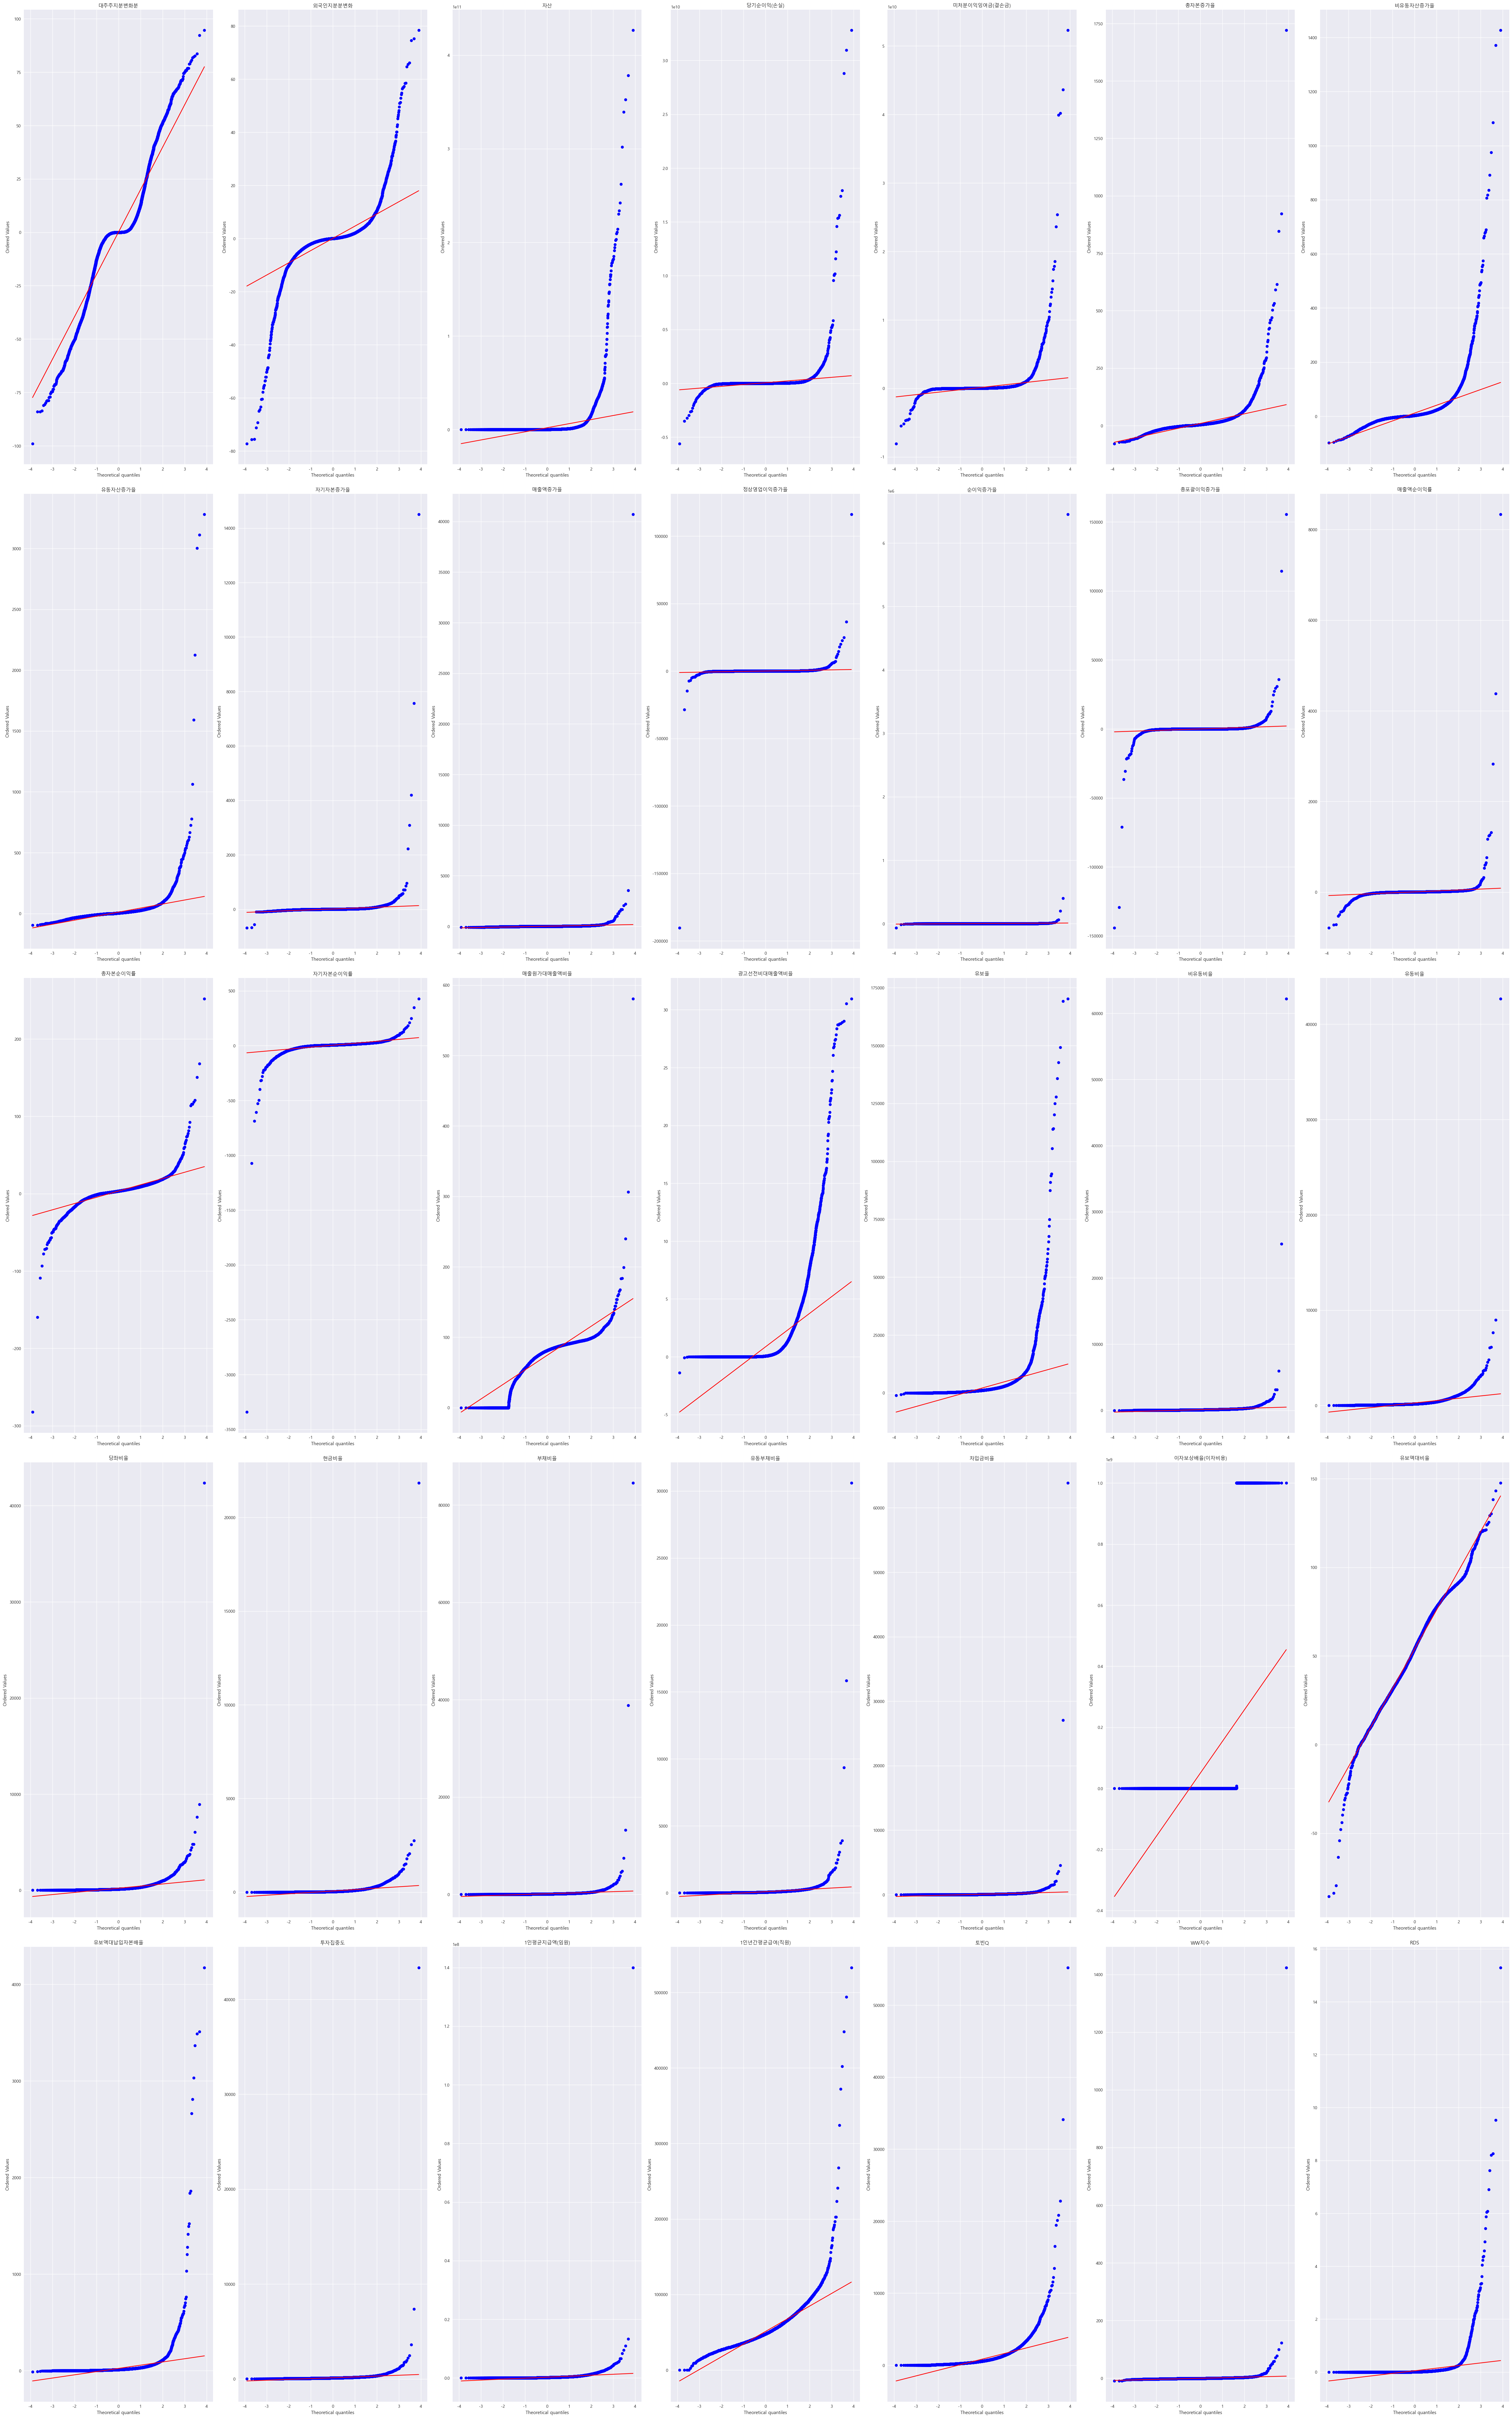

In [6]:
def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = "Malgun Gothic"
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((50, 80))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(수치형_df,7,5)


### 정규성검정

In [7]:
# 정규성 검정을 하나의 함수로
from scipy.stats import shapiro, anderson, kstest, jarque_bera, normaltest

def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])


In [8]:
## 샤피로
## 샤피로는 표본의 크기가 너무 크면 신뢰할수 없음
normal_test('shapiro',수치형_df)

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(Empty DataFrame
 Columns: [normal]
 Index: [],
         notnormal
 0        대주주지분변화분
 1        외국인지분분변화
 2              자산
 3       당기순이익(손실)
 4   미처분이익잉여금(결손금)
 5          총자본증가율
 6        비유동자산증가율
 7         유동자산증가율
 8         자기자본증가율
 9          매출액증가율
 10      정상영업이익증가율
 11         순이익증가율
 12       총포괄이익증가율
 13        매출액순이익률
 14        총자본순이익률
 15       자기자본순이익률
 16     매출원가대매출액비율
 17    광고선전비대매출액비율
 18            유보율
 19          비유동비율
 20           유동비율
 21           당좌비율
 22           현금비율
 23           부채비율
 24         유동부채비율
 25          차입금비율
 26   이자보상배율(이자비용)
 27         유보액대비율
 28     유보액대납입자본배율
 29          투자집중도
 30    1인평균지급액(임원)
 31   1인년간평균급여(직원)
 32            토빈Q
 33           WW지수
 34            RDS)

In [9]:
normal_test('kstest',수치형_df)

(Empty DataFrame
 Columns: [normal]
 Index: [],
         notnormal
 0        대주주지분변화분
 1        외국인지분분변화
 2              자산
 3       당기순이익(손실)
 4   미처분이익잉여금(결손금)
 5          총자본증가율
 6        비유동자산증가율
 7         유동자산증가율
 8         자기자본증가율
 9          매출액증가율
 10      정상영업이익증가율
 11         순이익증가율
 12       총포괄이익증가율
 13        매출액순이익률
 14        총자본순이익률
 15       자기자본순이익률
 16     매출원가대매출액비율
 17    광고선전비대매출액비율
 18            유보율
 19          비유동비율
 20           유동비율
 21           당좌비율
 22           현금비율
 23           부채비율
 24         유동부채비율
 25          차입금비율
 26   이자보상배율(이자비용)
 27         유보액대비율
 28     유보액대납입자본배율
 29          투자집중도
 30    1인평균지급액(임원)
 31   1인년간평균급여(직원)
 32            토빈Q
 33           WW지수
 34            RDS)

In [10]:
normal_test('anderson',수치형_df)

(Empty DataFrame
 Columns: [normal]
 Index: [],
         notnormal
 0        대주주지분변화분
 1        외국인지분분변화
 2              자산
 3       당기순이익(손실)
 4   미처분이익잉여금(결손금)
 5          총자본증가율
 6        비유동자산증가율
 7         유동자산증가율
 8         자기자본증가율
 9          매출액증가율
 10      정상영업이익증가율
 11         순이익증가율
 12       총포괄이익증가율
 13        매출액순이익률
 14        총자본순이익률
 15       자기자본순이익률
 16     매출원가대매출액비율
 17    광고선전비대매출액비율
 18            유보율
 19          비유동비율
 20           유동비율
 21           당좌비율
 22           현금비율
 23           부채비율
 24         유동부채비율
 25          차입금비율
 26   이자보상배율(이자비용)
 27         유보액대비율
 28     유보액대납입자본배율
 29          투자집중도
 30    1인평균지급액(임원)
 31   1인년간평균급여(직원)
 32            토빈Q
 33           WW지수
 34            RDS)

In [11]:
normal_test('jarque_bera',수치형_df)

(Empty DataFrame
 Columns: [normal]
 Index: [],
         notnormal
 0        대주주지분변화분
 1        외국인지분분변화
 2              자산
 3       당기순이익(손실)
 4   미처분이익잉여금(결손금)
 5          총자본증가율
 6        비유동자산증가율
 7         유동자산증가율
 8         자기자본증가율
 9          매출액증가율
 10      정상영업이익증가율
 11         순이익증가율
 12       총포괄이익증가율
 13        매출액순이익률
 14        총자본순이익률
 15       자기자본순이익률
 16     매출원가대매출액비율
 17    광고선전비대매출액비율
 18            유보율
 19          비유동비율
 20           유동비율
 21           당좌비율
 22           현금비율
 23           부채비율
 24         유동부채비율
 25          차입금비율
 26   이자보상배율(이자비용)
 27         유보액대비율
 28     유보액대납입자본배율
 29          투자집중도
 30    1인평균지급액(임원)
 31   1인년간평균급여(직원)
 32            토빈Q
 33           WW지수
 34            RDS)

In [12]:
normal_test('normal_test',수치형_df)

(Empty DataFrame
 Columns: [normal]
 Index: [],
 Empty DataFrame
 Columns: [notnormal]
 Index: [])

### 등분산검정

In [13]:
# H가 1인 경우 이분산성 / H가 0인 경우 등분산
from scipy.stats import bartlett
import pandas as pd
def bartlett_test(df, col, p_value = 0.05, H = 1):
    list= []
    for i in col:
        T, p_val =bartlett(df[df['target']==1][i], df[df['target']==0][i]) 
        list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    if H == 1:
        a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
        return a
    else:
        a = list[(list['p_value'] >= p_value)][['변수', 'p_value']].sort_values('p_value')
        return a
    

bartlett_test(df,col=수치형_df.columns.to_list())

,변수,p_value
14,총자본순이익률,0.000000e+00
25,차입금비율,0.000000e+00
24,유동부채비율,0.000000e+00
23,부채비율,0.000000e+00
22,현금비율,0.000000e+00
21,당좌비율,0.000000e+00
20,유동비율,0.000000e+00
19,비유동비율,0.000000e+00
18,유보율,0.000000e+00
33,WW지수,0.000000e+00


In [14]:
bartlett_test(df,col=수치형_df.columns.to_list(),H=0)

,변수,p_value
0,대주주지분변화분,0.061496


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(수치형_df.values, i) for i in range(수치형_df.shape[1])]
vif["features"] = 수치형_df.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,205.916222,부채비율
1,158.906688,비유동비율
2,151.476160,차입금비율
3,105.967857,유동비율
4,104.253191,매출액증가율
5,104.204209,WW지수
6,101.042182,당좌비율
7,35.443791,유동부채비율
8,10.656074,유보액대비율
9,8.716914,매출원가대매출액비율


In [16]:
수치형_df.drop('부채비율',axis=1,inplace=True)

vif = pd.DataFrame()


vif["VIF Factor"] = [variance_inflation_factor(수치형_df.values, i) for i in range(수치형_df.shape[1])]
vif["features"] = 수치형_df.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,136.580914,비유동비율
1,124.571971,차입금비율
2,105.649042,유동비율
3,104.225735,매출액증가율
4,104.175840,WW지수
5,100.880486,당좌비율
6,13.365548,유동부채비율
7,10.655469,유보액대비율
8,8.412173,매출원가대매출액비율
9,7.687322,1인년간평균급여(직원)


In [17]:
수치형_df.drop(['비유동비율','차입금비율'],axis=1,inplace=True)

vif = pd.DataFrame()


vif["VIF Factor"] = [variance_inflation_factor(수치형_df.values, i) for i in range(수치형_df.shape[1])]
vif["features"] = 수치형_df.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,104.336475,유동비율
1,104.128613,매출액증가율
2,104.078621,WW지수
3,100.079300,당좌비율
4,9.733950,유보액대비율
5,7.806278,매출원가대매출액비율
6,7.537965,1인년간평균급여(직원)
7,5.639697,유보율
8,5.332324,유보액대납입자본배율
9,5.111463,현금비율


In [18]:
수치형_df.drop(['매출액증가율'],axis=1,inplace=True)

vif = pd.DataFrame()


vif["VIF Factor"] = [variance_inflation_factor(수치형_df.values, i) for i in range(수치형_df.shape[1])]
vif["features"] = 수치형_df.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,103.710669,유동비율
1,99.473378,당좌비율
2,9.680646,유보액대비율
3,7.653772,매출원가대매출액비율
4,7.536855,1인년간평균급여(직원)
5,5.639658,유보율
6,5.332322,유보액대납입자본배율
7,5.110550,현금비율
8,3.859147,총자본증가율
9,2.504835,당기순이익(손실)


In [19]:
수치형_df.drop(['유동비율'],axis=1,inplace=True)

vif = pd.DataFrame()


vif["VIF Factor"] = [variance_inflation_factor(수치형_df.values, i) for i in range(수치형_df.shape[1])]
vif["features"] = 수치형_df.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,8.436505,유보액대비율
1,7.606556,매출원가대매출액비율
2,7.461032,1인년간평균급여(직원)
3,6.380042,당좌비율
4,5.629785,유보율
5,5.329559,유보액대납입자본배율
6,5.109670,현금비율
7,3.859065,총자본증가율
8,2.504831,당기순이익(손실)
9,2.422156,유동자산증가율
